**LOAD DATA**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/BBCA.JK_10_years.csv')
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-12-08 00:00:00+00:00,2246.477539,2655,2680,2645,2655,37435500
1,2014-12-09 00:00:00+00:00,2242.247314,2650,2680,2630,2660,38254000
2,2014-12-10 00:00:00+00:00,2250.708008,2660,2675,2630,2630,32998000
3,2014-12-11 00:00:00+00:00,2246.477539,2655,2675,2645,2660,54459500
4,2014-12-12 00:00:00+00:00,2242.247314,2650,2665,2640,2640,50302000
...,...,...,...,...,...,...,...
2468,2024-11-26 00:00:00+00:00,10000.000000,10000,10250,10000,10250,62310100
2469,2024-11-28 00:00:00+00:00,10000.000000,10000,10075,9925,9975,57443500
2470,2024-11-29 00:00:00+00:00,10000.000000,10000,10100,9950,10000,76886000
2471,2024-12-02 00:00:00+00:00,9750.000000,9750,10050,9750,10000,87879600


**CEK INDEX/KOLOM**

In [2]:
print(df.columns)


Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


**CEK TYPE DATA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2473 non-null   object 
 1   Adj Close  2473 non-null   float64
 2   Close      2473 non-null   int64  
 3   High       2473 non-null   int64  
 4   Low        2473 non-null   int64  
 5   Open       2473 non-null   int64  
 6   Volume     2473 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 135.4+ KB


**MENAMPILKAN KORELASI TIAP KOLOM**

JIKA BERNILAI 1 MAKA KORELASI KUAT

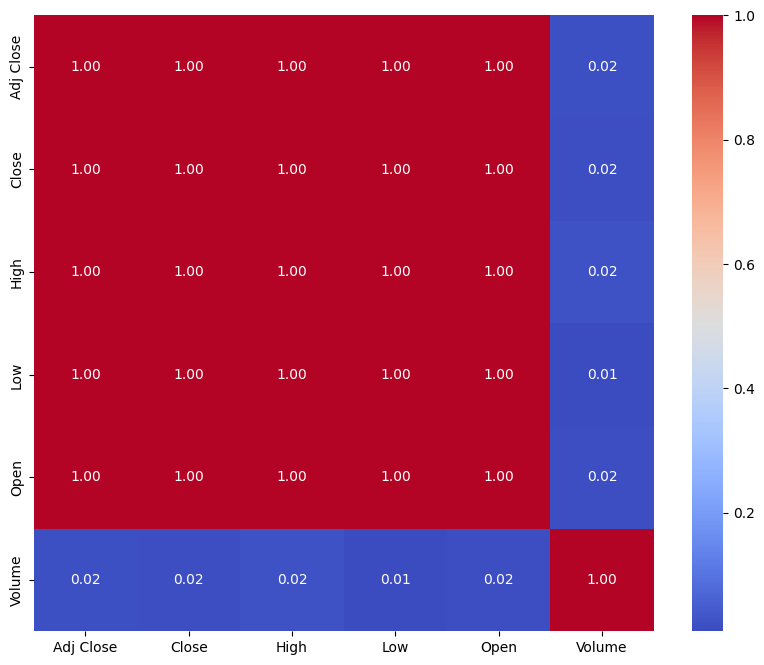

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = df.select_dtypes(include=['float','int'])
corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

**STATISTIK DASAR**

In [5]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03
mean,5406.396759,5851.526486,5903.008492,5800.305297,5852.221998,8.119395e+07
std,2451.380659,2391.987223,2409.690125,2373.570507,2391.948707,5.535131e+07
min,1924.916504,2260.000000,2350.000000,2200.000000,2275.000000,0.000000e+00
25%,3143.089600,3600.000000,3630.000000,3575.000000,3620.000000,5.259010e+07
50%,5278.061035,5820.000000,5895.000000,5790.000000,5840.000000,7.076300e+07
75%,7262.393066,7750.000000,7850.000000,7700.000000,7750.000000,9.707940e+07
max,10895.657230,10950.000000,10950.000000,10775.000000,10900.000000,1.062862e+09


**MEMBUAT KOLOM RETURN (DISTRIBUSI RETURN HARIAN)**

In [6]:
df['return']=df['Close'].pct_change().fillna(0)
print(df[['Close','Open','return']].round(3).head())

   Close  Open  return
0   2655  2655   0.000
1   2650  2660  -0.002
2   2660  2630   0.004
3   2655  2660  -0.002
4   2650  2640  -0.002


In [7]:
df['Log_rturn'] = np.log(df['Close']/df['Close'].shift(1)).fillna(0)
print(df[['Close','Open','Log_rturn']].round(3).head())

   Close  Open  Log_rturn
0   2655  2655      0.000
1   2650  2660     -0.002
2   2660  2630      0.004
3   2655  2660     -0.002
4   2650  2640     -0.002


**CEK OUTLIERS DAN MENJUMLAH TOTAL OUTLIER**

OUTLIERS KURANG DARI 5% DARI JUMLAH DATA MAKA CUKUP DIHAPUS

In [8]:
mean_return=df['return'].mean()
std_return=df['return'].std()
upper_limit = mean_return + 3*std_return
lower_limit = mean_return - 3*std_return
outliers = df[(df['return'] > upper_limit) | (df['return'] < lower_limit)]
print('jumlah outlier : ',{len(outliers)})
print(outliers[['Date','return']])


Q1 = df['return'].quantile(0.25)
Q3 = df['return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outlier = df[(df['return'] >= lower_bound) & (df['return'] <= upper_bound)]
print(f"Data setelah menghapus outlier: {len(df_no_outlier)} baris")


jumlah outlier :  {27}
                           Date    return
94    2015-04-27 00:00:00+00:00 -0.046980
171   2015-08-24 00:00:00+00:00 -0.048421
174   2015-08-27 00:00:00+00:00  0.063291
200   2015-10-05 00:00:00+00:00  0.056842
239   2015-11-30 00:00:00+00:00 -0.058935
240   2015-12-01 00:00:00+00:00  0.070707
597   2017-05-16 00:00:00+00:00 -0.046575
895   2018-07-09 00:00:00+00:00  0.046595
1326  2020-03-09 00:00:00+00:00 -0.066935
1329  2020-03-12 00:00:00+00:00 -0.049573
1332  2020-03-17 00:00:00+00:00 -0.079137
1334  2020-03-19 00:00:00+00:00 -0.070000
1336  2020-03-23 00:00:00+00:00 -0.064414
1338  2020-03-26 00:00:00+00:00  0.173333
1352  2020-04-16 00:00:00+00:00 -0.044667
1362  2020-04-30 00:00:00+00:00  0.065979
1377  2020-05-28 00:00:00+00:00  0.066465
1380  2020-06-03 00:00:00+00:00  0.078358
1389  2020-06-16 00:00:00+00:00  0.047273
1447  2020-09-10 00:00:00+00:00 -0.069656
1484  2020-11-05 00:00:00+00:00  0.056701
1560  2021-03-01 00:00:00+00:00  0.049925
1590  2021-

**DISTRIBUSI RETURN HARIAN BERBENTUK SKEWNS MAKA DISTRIBUSI NORMAL**

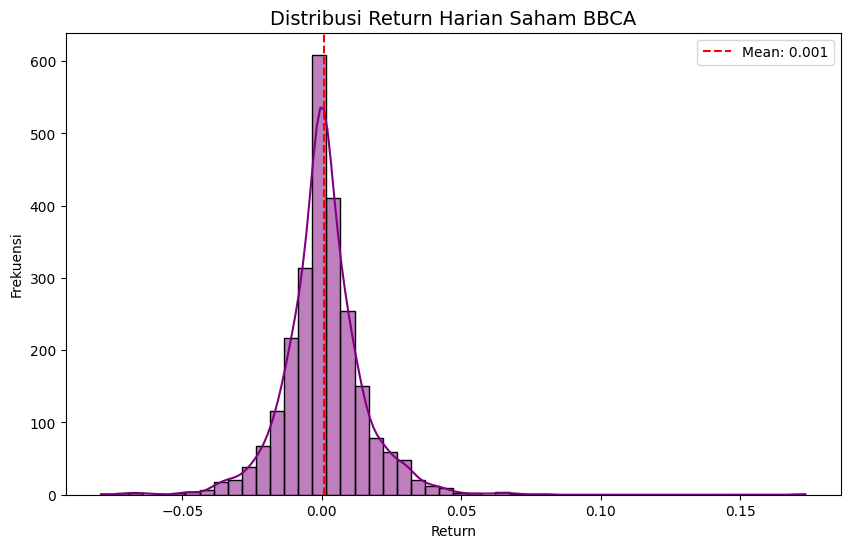

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribusi Return Harian Saham BBCA', fontsize=14)
plt.xlabel('Return')
plt.ylabel('Frekuensi')
plt.axvline(df['return'].mean(), color='red', linestyle='--', label=f"Mean: {df['return'].mean():.3f}")
plt.legend()
plt.show()


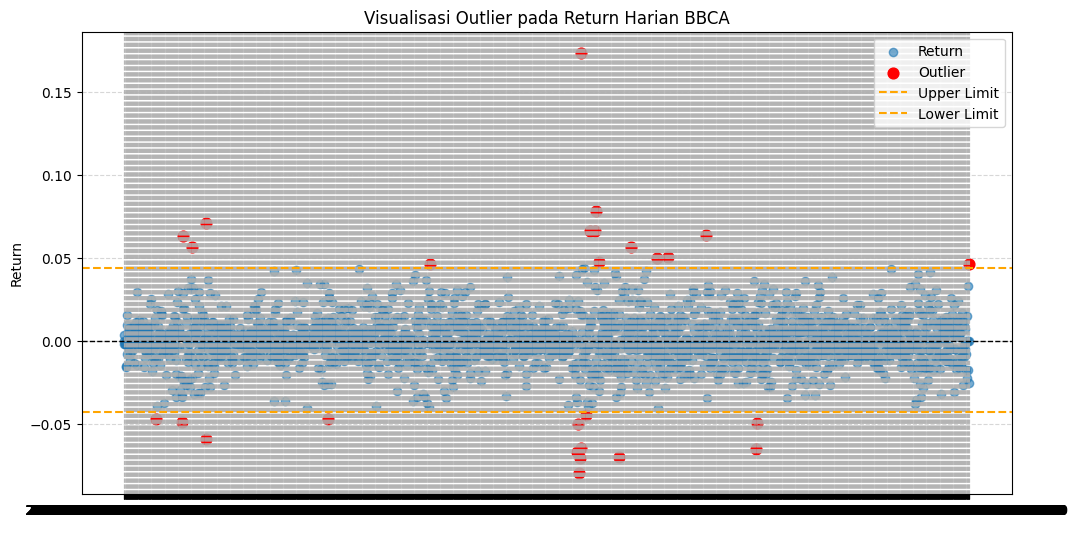

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(df['Date'], df['return'], label='Return', alpha=0.6)
plt.scatter(outliers['Date'], outliers['return'], color='red', label='Outlier', s=60)
plt.axhline(upper_limit, color='orange', linestyle='--', label='Upper Limit')
plt.axhline(lower_limit, color='orange', linestyle='--', label='Lower Limit')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Visualisasi Outlier pada Return Harian BBCA')
plt.xlabel(' ')
plt.ylabel('Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


*BENTUK SCATTER TERLIHAT CUKUP BER-KORELASI ANTAR KOLOM***

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df= df.set_index('Date')


**MEMBUAT TARGET DATA**

In [32]:
X = df.drop(['Adj Close','High','Low','Open','Volume'],axis=1)
y = df['Close']

In [16]:
train_size = int(len(df)*0.8)
train_size

1978

In [33]:
X_train = df.iloc[:train_size]
y_train = df.iloc[:train_size]
X_test = df.iloc[train_size:]
y_test = df.iloc[train_size:]



In [18]:
train_size = int(len(df)*0.8)
train_size

1978

In [34]:
X_train.info()
y_train.info()
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 2014-12-08 00:00:00+00:00 to 2022-11-10 00:00:00+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1978 non-null   float64
 1   Close      1978 non-null   int64  
 2   High       1978 non-null   int64  
 3   Low        1978 non-null   int64  
 4   Open       1978 non-null   int64  
 5   Volume     1978 non-null   int64  
 6   return     1978 non-null   float64
 7   Log_rturn  1978 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 139.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 2014-12-08 00:00:00+00:00 to 2022-11-10 00:00:00+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1978 non-null   float64
 1   Close      1978 non-null   int64  
 2   High       1978 non-null   int64  
 3   Low        1978 non-null   int64  
 4   Open      

In [20]:
X_train.isnull().sum()
y_train.isnull().sum()
X_test.isnull().sum()
y_test.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
return,0
Log_rturn,0


In [21]:
y_test.isnull().sum()
y_train.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
return,0
Log_rturn,0


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [23]:
df['return'] = df['return'].fillna(0)

In [25]:
df = df.dropna()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²:  {r2:.4f}')

MAE: 0.0000
MSE: 0.0000
R²:  1.0000


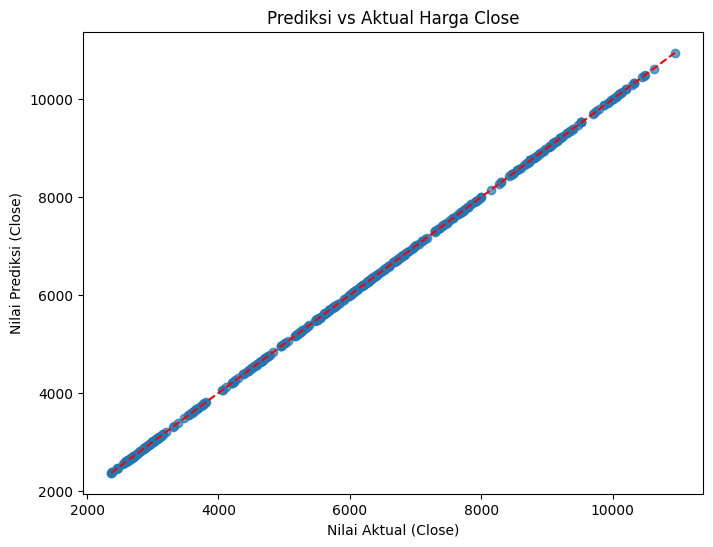

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Nilai Aktual (Close)')
plt.ylabel('Nilai Prediksi (Close)')
plt.title('Prediksi vs Aktual Harga Close')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np


y_train = y_train['Close']
y_test = y_test['Close']

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train,y_train)
model_pred = model_rf.predict(X_test)
random_mae = mean_absolute_error(y_test,model_pred)
random_mse = mean_squared_error(y_test,model_pred)
random_r2 = r2_score(y_test,model_pred)
print('MAE:',round(random_mae,2))
print('MSE:',round(random_mse,2))
print('R2:',round(random_r2,2))

MAE: 577.27
MSE: 654205.14
R2: -0.59


MAE : 54.6342
MSE : 7576.7939
R²  : 0.9986


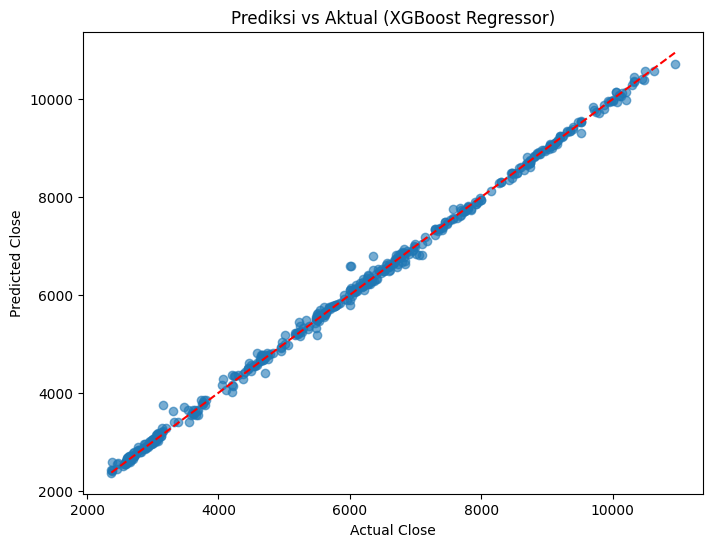

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#Latih model
xgb_model.fit(X_train, y_train)

# Prediksi data test
y_pred = xgb_model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")

# 1 Visualisasi hasil prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title("Prediksi vs Aktual (XGBoost Regressor)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
!pip install tensorflow


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 40637304.0000 - mae: 5901.8481 - val_loss: 39439052.0000 - val_mae: 5834.8647
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40512636.0000 - mae: 5880.3608 - val_loss: 35606248.0000 - val_mae: 5511.8315
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33552718.0000 - mae: 5289.2983 - val_loss: 18927532.0000 - val_mae: 3901.0215
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13719036.0000 - mae: 3256.3979 - val_loss: 7234464.0000 - val_mae: 1868.4390
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3641902.0000 - mae: 1496.6189 - val_loss: 4442892.0000 - val_mae: 1191.3335
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1877732.3750 - mae: 1003.8661 - val_loss: 2688354.7500 - val_mae: 913.9198
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1221663.3750 - mae: 794.3129 - val_loss: 1736043.3750 - val_mae: 699.1550
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7514

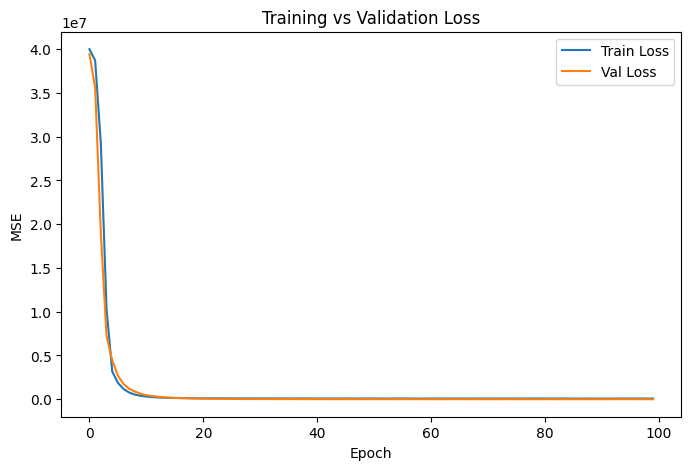

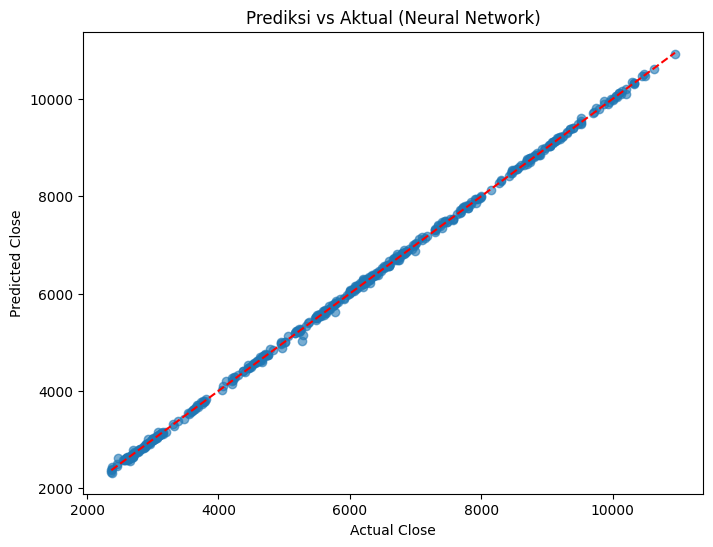

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Bangun arsitektur neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output tunggal untuk regresi
])

#  Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#  Latih model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluasi model
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²:  {r2:.4f}')

#  Visualisasi training loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Visualisasi hasil prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title("Prediksi vs Aktual (Neural Network)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [30]:
import joblib
joblib.dump(model, 'model_regresi_linier_bca.pkl')


['model_regresi_linier_bca.pkl']

In [31]:
model_loaded = joblib.load('model_regresi_linier_bca.pkl')

data_baru = pd.DataFrame({
    'Open': [9450],
    'High': [9550],
    'Low': [9400],
    'Close': [9500],
    'Volume': [1200000] # Added volume
})

# Select only the columns used for training and add 'return'
data_baru = data_baru[['Close', 'Open']]
data_baru['return'] = 0 # Add return column and fill with 0

prediksi_return = model_loaded.predict(data_baru)
print(f"Prediksi return: {prediksi_return[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Prediksi return: 22239876.0000
